# Reto Pokemon by @jasonssdev

## Importar Librerias

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## Path


In [49]:
# Project root directory
project_root = Path().resolve()
pokemon_data_path = project_root.parent / "data" / "all_pokemon_data.csv"

pokemon_data_path

WindowsPath('C:/Users/ezequ/OneDrive/Escritorio/Analisis_python/retos/pydatapanama-retos/retos/reto-pokemon-jasonssdev/data/all_pokemon_data.csv')

## Cargar Dataset

In [50]:
df_pokemon = pd.read_csv(pokemon_data_path)

## Preguntas

## 🔹 Nivel Low (Básico)

### Pregunta 1: ¿Cuántos pokemones hay en total?

In [51]:
# Verificar canditdad de pokemones duplicados

df_pokemon.info()

duplicados = df_pokemon[df_pokemon.duplicated(subset=['Name'], keep=False)]

print(duplicados[['Name', 'Form']])
print(f"Total de nombres duplicados: {duplicados['Name'].nunique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   1184 non-null   object
 1   National Dex #         1184 non-null   int64 
 2   Primary Typing         1184 non-null   object
 3   Secondary Typing       654 non-null    object
 4   Secondary Typing Flag  1184 non-null   bool  
 5   Generation             1184 non-null   object
 6   Legendary Status       1184 non-null   bool  
 7   Form                   1184 non-null   object
 8   Alt Form Flag          1184 non-null   bool  
 9   Evolution Stage        1184 non-null   int64 
 10  Number of Evolution    1184 non-null   int64 
 11  Color ID               1184 non-null   object
 12  Catch Rate             1184 non-null   int64 
 13  Height (dm)            1184 non-null   int64 
 14  Weight (hg)            1184 non-null   int64 
 15  Height (in)          

In [52]:

#codigo
# 
total_pokemon = df_pokemon['Name'].count()

print(f"Hay {total_pokemon} Pokémon en total")

Hay 1184 Pokémon en total


### Pregunta 2: ¿Cuáles son los 5 tipos más comunes (columna `Primary Typing`)?

In [53]:
#codigo
top_tipos = df_pokemon['Primary Typing'].value_counts().head(5)
print("Los 5 tipos más comunes son:")
print(top_tipos)


Los 5 tipos más comunes son:
Primary Typing
water     145
normal    128
grass     113
bug        89
fire       77
Name: count, dtype: int64


### Pregunta 3: ¿Cuál es el promedio de Velocidad `(Speed)` de todos los pokemones?

In [54]:
#codigo

promedio_velocidad = df_pokemon['Speed'].mean()
print(f"El promedio de Velocidad de todos los Pokémon es: {promedio_velocidad:.2f}")


El promedio de Velocidad de todos los Pokémon es: 69.73


## 🔸 Nivel Medium (Intermedio)

### Pregunta 4: ¿Cuál es la correlación entre las estadísticas `Attack`, `Defense` y `Speed`? Muestra un heatmap.

In [55]:
#codigo
estadisticas = df_pokemon[['Attack', 'Defense', 'Speed']]

correlacion = estadisticas.corr()

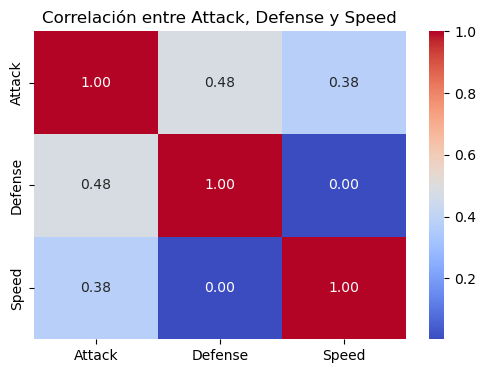

In [56]:
#codigo
plt.figure(figsize=(6,4))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Attack, Defense y Speed')
plt.show()

### Pregunta 5: ¿Qué tipo (`Primary Typing`) tiene el mayor promedio de `Attack`?

In [57]:
#codigo
promedio_attack_por_tipo = df_pokemon.groupby('Primary Typing')['Attack'].mean()

tipo_mayor_promedio_attack = promedio_attack_por_tipo.idxmax()
promedio_mas_alto = promedio_attack_por_tipo.max()

print(f"El tipo con mayor promedio de Attack es: {tipo_mayor_promedio_attack} ({promedio_mas_alto:.2f})")


El tipo con mayor promedio de Attack es: dragon (105.98)


### Pregunta 6: Crear un histograma de la variable `Speed`

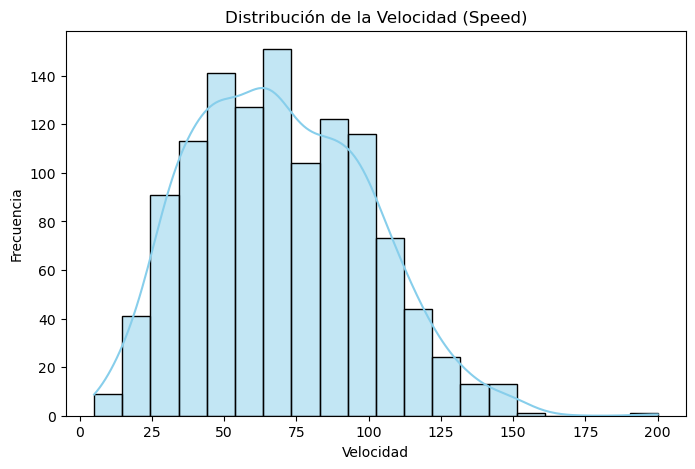

In [58]:
#codigo
plt.figure(figsize=(8,5))
sns.histplot(df_pokemon['Speed'], bins=20, kde=True, color='skyblue')

plt.title('Distribución de la Velocidad (Speed)')
plt.xlabel('Velocidad')
plt.ylabel('Frecuencia')
plt.show()

## 🔺 Nivel High (Avanzado)

### Pregunta 7: ¿Qué pokemones tienen estadísticas totales (`Base Stat Total`) superiores al percentil 90? ¿Qué tipos predominan en este grupo?

In [59]:
#codigo
percentil_90 = df_pokemon['Base Stat Total'].quantile(0.90)
pokemon_top = df_pokemon[df_pokemon['Base Stat Total'] > percentil_90]
tipos_predominantes = pokemon_top['Primary Typing'].value_counts().head(5)

print(f"Los pokemones que superan el pertil superior al 90 son: ")
print(pokemon_top[['Name', 'Base Stat Total', 'Primary Typing']].head(6))
print()
print("Tipos que predominan este grupo:")
print(tipos_predominantes)


Los pokemones que superan el pertil superior al 90 son: 
                 Name  Base Stat Total Primary Typing
3       venusaur-mega              625          grass
7    charizard-mega-x              634           fire
8    charizard-mega-y              634           fire
12     blastoise-mega              630          water
87      alakazam-mega              600        psychic
128       gengar-mega              600          ghost

Tipos que predominan este grupo:
Primary Typing
dragon     22
psychic    21
water      10
steel      10
normal      7
Name: count, dtype: int64


### Pregunta 8: Clasifica a los pokemones en tres categorías según su `Base Stat Total`: "Débil", "Normal" y "Fuerte". Luego, muestra la distribución de estas categorías en un gráfico de barras.

In [60]:
#codigo
p33 = df_pokemon['Base Stat Total'].quantile(0.33)
p66 = df_pokemon['Base Stat Total'].quantile(0.66)

def clasificar_base_stat(valor):
    if valor < p33:
        return "Débil"
    elif valor < p66:
        return "Normal"
    else:
        return "Fuerte"

df_pokemon['Categoria'] = df_pokemon['Base Stat Total'].apply(clasificar_base_stat)

C:\Users\ezequ\AppData\Local\Temp\ipykernel_20024\915465716.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_pokemon, x='Categoria', palette='viridis')


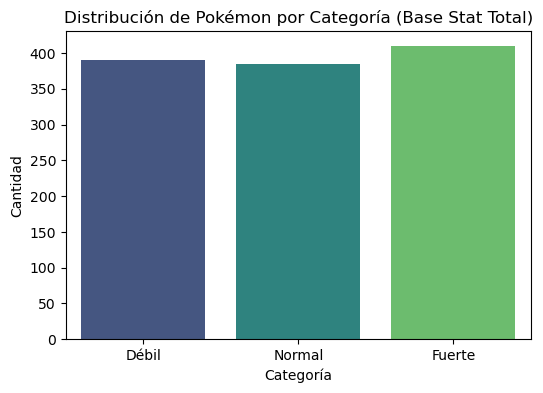

In [61]:
#codigo
plt.figure(figsize=(6,4))
sns.countplot(data=df_pokemon, x='Categoria', palette='viridis')
plt.title('Distribución de Pokémon por Categoría (Base Stat Total)')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.show()

### Pregunta 9: Crear un pairplot de `Attack`, `Defense`, `Speed` y colorear por `Legendary`

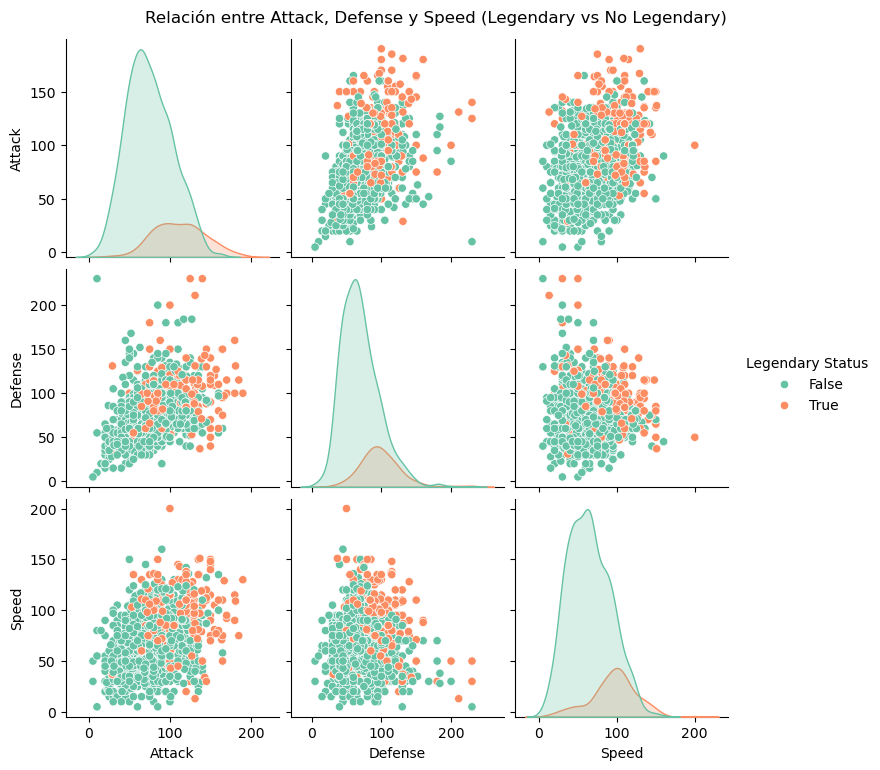

In [62]:
#codigo
datos_pairplot = df_pokemon[['Attack', 'Defense', 'Speed', 'Legendary Status']]

sns.pairplot(datos_pairplot, hue='Legendary Status', diag_kind='kde', palette='Set2')

plt.suptitle('Relación entre Attack, Defense y Speed (Legendary vs No Legendary)', y=1.02)
plt.show()